In [ ]:
import numpy as np
import pickle
from PIL import Image
import chainer
from chainer import cuda, serializers

from biggan import Generator

In [ ]:
w = pickle.load(open("BIGGAN_weights.pkl", "rb"), encoding="bytes")

In [ ]:
model = Generator()

In [ ]:
model.copy_params_from_tf(w)

In [ ]:
model.to_gpu(0)

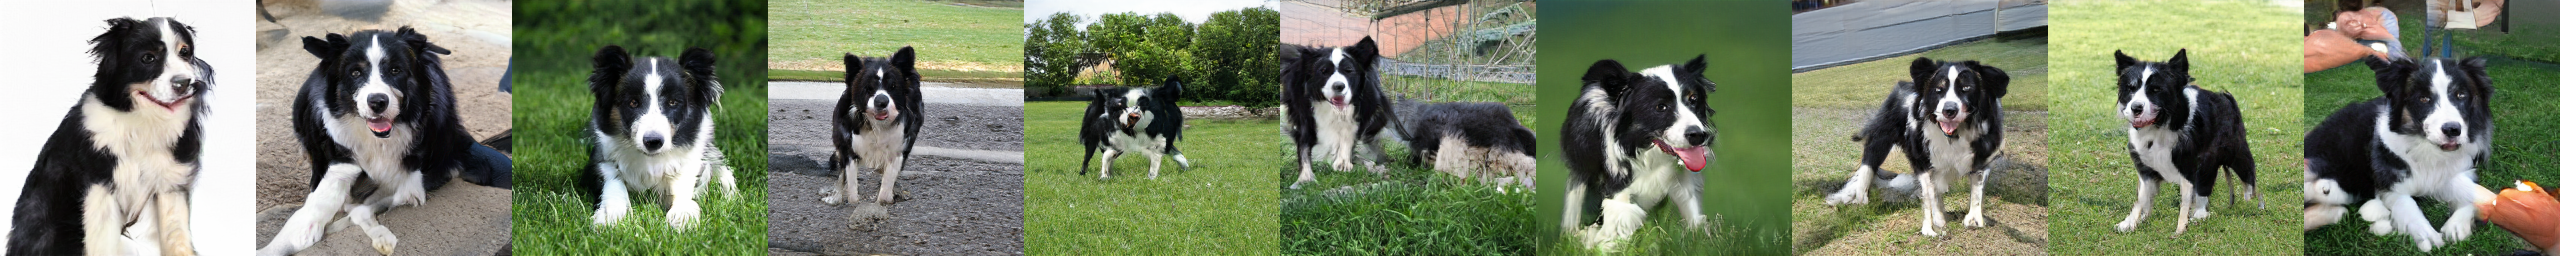

In [9]:
from scipy.stats import truncnorm
def truncated_z_sample(batch_size, truncation=1., seed=None):
    state = None if seed is None else np.random.RandomState(seed)
    values = truncnorm.rvs(-2, 2, size=(batch_size, 140), random_state=state)
    return truncation * values

tmp = 0.4
n = 10
c = 232
z = model.xp.array(truncated_z_sample(n, tmp, 3), dtype="float32")
with chainer.using_config("train", False), chainer.using_config("enable_backprop", False):
    imgs = model(z, model.xp.eye(1000).astype("float32")[[c]*n])
    imgs = imgs.data
    
img = np.concatenate(cuda.to_cpu(imgs).transpose(0, 2, 3, 1), axis=1)
Image.fromarray(((img+1) * 127.5).astype("uint8"))